# Challenge Set 7

### Challenge 1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [1]:
import pandas as pd
import numpy as np

In [2]:
vote_df = pd.read_csv('house-votes-84.data',header=None)

In [3]:
vote_df.replace(to_replace='y',value=1.0,inplace=True)
vote_df.replace(to_replace='n',value=0.0,inplace=True)

In [4]:
vote_df.replace(to_replace='?',value=np.nan,inplace=True)

In [5]:
vote_df.fillna(vote_df.mean(),inplace=True)

### Challenge 2

Split the data into a test and training set. Use this function:

    from sklearn.cross_validation import train_test_split
    
Ooops. https://stackoverflow.com/questions/54726125/no-module-named-sklearn-cross-validation

    from sklearn.model_selection import train_test_split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
party = np.array(vote_df[0])
df = vote_df.copy()
del df[0]

Where applicable, use test_size=.30, random_state=4444.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df,party,test_size=0.30,
                                                   random_state=4444)

### Challenge 3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

    from sklearn.neighbors import KNeighborsClassifier

Try it with a lot of different *k* values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each *k*.

You can use this to calculate accuracy:

    from sklearn.metrics import accuracy_score

Which k value gives the highest accuracy?

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
def all_the_ks(data,target,test_data,test_score,max_k=20):
    score_dict = {}
    for k in range(1,max_k+1):
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(data,target)
        yp = knn_model.predict(test_data)
        score_dict[k]=accuracy_score(test_score,yp)
    return score_dict

In [11]:
k_performance = all_the_ks(X_train,y_train,X_test,y_test)

In [84]:
print(k_performance)

{1: 0.9007633587786259, 2: 0.8931297709923665, 3: 0.9007633587786259, 4: 0.9007633587786259, 5: 0.916030534351145, 6: 0.9312977099236641, 7: 0.916030534351145, 8: 0.9236641221374046, 9: 0.9312977099236641, 10: 0.9312977099236641, 11: 0.9236641221374046, 12: 0.9236641221374046, 13: 0.9236641221374046, 14: 0.9236641221374046, 15: 0.9236641221374046, 16: 0.9236641221374046, 17: 0.9236641221374046, 18: 0.916030534351145, 19: 0.916030534351145, 20: 0.916030534351145}


*k* = 6, 9, 10 are tied for first.

### Challenge 4

Make a similar model but with LogisticRegression instead and calculate test accuracy.

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
logit_model.score(X_test,y_test)

0.9312977099236641

Identical to the best *k*-nearest-neighbors models.

### Challenge 5

Make a bar graph of democrats and republicans. How many of each are there?

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

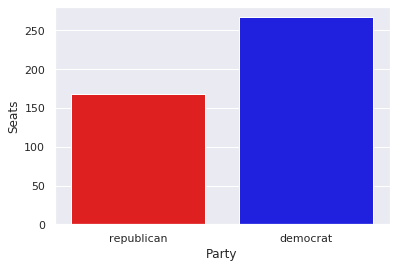

In [15]:
sns.set(palette=['red','blue'])
ax=sns.countplot(x=vote_df[0])
ax.set(xlabel='Party', ylabel='Seats')
plt.show();

In [85]:
vote_df[0].value_counts()

democrat      267
republican    168
Name: 0, dtype: int64

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

In [16]:
def late_20th_century(sequence):
    hr = np.full_like(sequence,'democrat',dtype=np.object)
    return hr
def late_19th_century(sequence):
    hr = np.full_like(sequence,'republican',dtype=np.object)
    return hr

In [17]:
dp = late_20th_century(party)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(party, dp)

0.6137931034482759

In [20]:
rp = late_19th_century(party)
accuracy_score(party, rp)

0.38620689655172413

### Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

In [21]:
dp_pred = late_20th_century(y_test)
rp_pred = late_19th_century(y_test)

In [22]:
ks = np.array(list(k_performance.keys()))

In [23]:
logit_perf = np.full_like(ks,logit_model.score(X_test,y_test),dtype=np.float)
dp_perf = np.full_like(ks,accuracy_score(y_test,dp_pred),dtype=np.float)
rp_perf = np.full_like(ks,accuracy_score(y_test,rp_pred),dtype=np.float)

In [24]:
ksc = np.array(list(k_performance.values()))

In [25]:
plot_that = pd.concat([pd.Series(ks),pd.Series(rp_perf),pd.Series(dp_perf),
                       pd.Series(ksc),pd.Series(logit_perf)],axis=1)

In [26]:
plot_that.columns=['k','Rep','Dem','knn','logit']

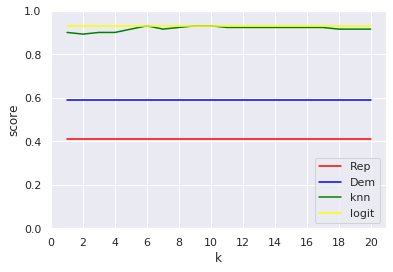

In [27]:
sns.set_style('whitegrid')
sns.set(palette = sns.color_palette(palette=['red','blue','green','yellow']))
sns.lineplot(data=plot_that,x='k',y='Rep')
sns.lineplot(data=plot_that,x='k',y='Dem')
sns.lineplot(data=plot_that,x='k',y='knn')
ax=sns.lineplot(data=plot_that,x='k',y='logit',legend='brief')
ax.set(xlabel='k',ylabel='score',ylim=[0.0,1.0])
plt.legend(['Rep','Dem','knn','logit'],loc=4)
plt.xticks(np.linspace(0,20,11));

### Challenge 7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

    from sklearn.learning_curve import learning_curve

Oops. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

    train_cv_err = np.mean(train_err, axis=1)
    test_cv_err = np.mean(ts_err, axis=1)

Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

In [28]:
from sklearn.model_selection import learning_curve

Recall that I named the whole collection of party labels

    party
    
and the entire collection of coded vote data as

    df

In [86]:
loge_model = LogisticRegression()
n, tr_scores, tst_scores = learning_curve(loge_model,df,party,random_state=4444,cv=7)

In [87]:
n

array([ 37, 120, 204, 288, 372])

In [88]:
tr_scores

array([[0.97297297, 0.97297297, 0.97297297, 0.97297297, 0.97297297,
        0.97297297, 0.97297297],
       [0.91666667, 0.925     , 0.96666667, 0.96666667, 0.96666667,
        0.96666667, 0.96666667],
       [0.93627451, 0.95588235, 0.98039216, 0.93627451, 0.94117647,
        0.94117647, 0.94117647],
       [0.9375    , 0.94791667, 0.96527778, 0.93402778, 0.94791667,
        0.94791667, 0.94791667],
       [0.92741935, 0.93010753, 0.95430108, 0.92741935, 0.93010753,
        0.94354839, 0.93548387]])

Ummm, there are five rows, not five columns. So I'll need to average across rows.

In [89]:
avg_tr = [np.mean(row) for row in tr_scores]
avg_tst = [np.mean(row) for row in tst_scores]

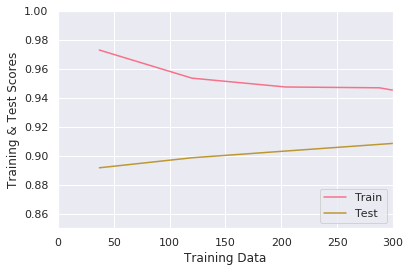

In [91]:
plt.xlabel('Training Data')
plt.ylabel('Training & Test Scores')
plt.axis([0,300,0.85,1.0])
sns.lineplot(n,avg_tr)
sns.lineplot(n,avg_tst)
plt.legend(['Train','Test'],loc=4);

Draw the learning curve for KNN with the best k value as well.

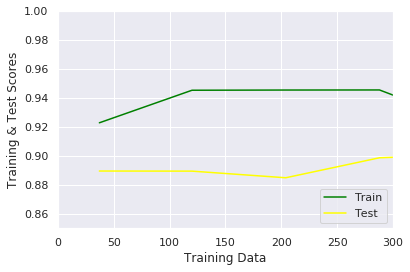

In [93]:
k_model = KNeighborsClassifier(n_neighbors=6)
nk, trk_scores, tstk_scores = learning_curve(k_model,df,party,random_state=4444,cv=7)
avg_trk = [np.mean(row) for row in trk_scores]
avg_tstk = [np.mean(row) for row in tstk_scores]
plt.xlabel('Training Data')
plt.ylabel('Training & Test Scores')
plt.axis([0,300,0.85,1.0])
sns.set(palette = sns.color_palette(palette=['green','yellow']))
sns.lineplot(nk,avg_trk)
sns.lineplot(nk,avg_tstk)
plt.legend(['Train','Test'],loc=4);

### Challenge 8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

    from sklearn.naive_bayes import GaussianNB

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)
gnb_model.score(X_test,y_test)

0.9389312977099237

SVM (Support Vector Machine) Classifier

    from sklearn.svm import SVC

In [37]:
from sklearn.svm import SVC

In [38]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
svc_model.score(X_test,y_test)

0.9465648854961832

Decision Tree

    from sklearn.tree import DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)
dtc_model.score(X_test,y_test)

0.9465648854961832

Random Forest

    from sklearn.ensemble import RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)
rfc_model.score(X_test,y_test)

0.9541984732824428

### Challenge 9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

    from sklearn.model_selection import cross_val_score

Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
gnb_model = GaussianNB()
svc_model = SVC()
dtc_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()

In [45]:
gnb_scores = cross_val_score(gnb_model,df,party)
np.mean(gnb_scores)

0.9402298850574713

In [46]:
svc_scores = cross_val_score(svc_model,df,party)
np.mean(svc_scores)

0.9563218390804596

In [47]:
dtc_scores = cross_val_score(dtc_model,df,party)
np.mean(dtc_scores)

0.9402298850574713

In [48]:
rfc_scores = cross_val_score(rfc_model,df,party)
np.mean(rfc_scores)

0.9632183908045977

### Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y -> 1, n -> 0.

Convert each ? to the mode of the column (if a representative has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [49]:
vote_df = pd.read_csv('house-votes-84.data',header=None)
vote_df.replace(to_replace='y',value=1.0,inplace=True)
vote_df.replace(to_replace='n',value=0.0,inplace=True)

In [50]:
mode_series = vote_df.mode().squeeze()
mode_dict = mode_series.to_dict()

In [51]:
vote_df.replace(to_replace='?',value=mode_dict,inplace=True)

In [52]:
pd.__version__

'1.0.3'

Wow, that's nuts. The pandas docs for 1.0.3 claim there's a solution where I pass the one-line dataframe from mode() to fillna() (after I replace all the '?' with np.nan as above) but It. Would. Not. Work. and I had to figure out this dictionary workaround.

In [53]:
N = np.random.randint(1,16)
N

10

(It was 4 the first time I ran it.)

In [54]:
df = vote_df.copy()
del df[0]

In [55]:
y = df[4]
del df[4]

In [56]:
vote_model = LogisticRegression()
vote_scores = cross_val_score(vote_model,df,y)
np.mean(vote_scores)

0.9011494252873564

### Challenge 11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

In [57]:
mv_df = pd.read_csv('2013_movies.csv')

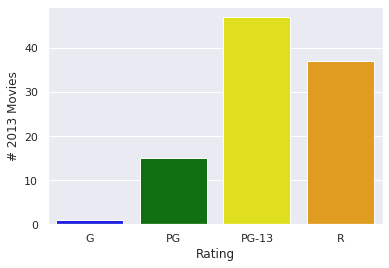

In [58]:
sns.set(palette=['blue','green','yellow','orange','red','purple'])
ax=sns.countplot(x=mv_df['Rating'],order=['G','PG','PG-13','R'])
ax.set(xlabel='Rating', ylabel='# 2013 Movies')
plt.show();

In [59]:
mv_df = mv_df[mv_df['Rating']!='G']
mv_df = mv_df[mv_df['Budget'].notna()]

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

In [60]:
rat = mv_df['Rating'].copy()
del mv_df['Rating']
del mv_df['Title']
del mv_df['Director']

In [61]:
mv_df['Date']=pd.to_datetime(mv_df['ReleaseDate'],format='%Y-%m-%d %H:%M:%S')
mv_df['JDay']=mv_df['Date'].dt.strftime('%j').astype(float)

In [62]:
del mv_df['ReleaseDate']
del mv_df['Date']

In [63]:
mv_knn = KNeighborsClassifier(n_neighbors=6)
mvk_scores = cross_val_score(mv_knn,mv_df,rat)
np.mean(mvk_scores)

0.34967320261437906

In [64]:
mv_loge = LogisticRegression()
mvl_scores = cross_val_score(mv_loge,mv_df,rat)
np.mean(mvl_scores)

0.5281045751633987

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

In [65]:
moron = np.full_like(rat,'PG-13',dtype=np.object)
accuracy_score(rat,moron)

0.4606741573033708

How much better do KNN and logistic regression do versus the baseline?

KNN actually did worse.

Logistic regression only scored about 0.08 better.

What are the coefficients of logistic regression? Which features affect the outcome how?

In [94]:
mv_train,mv_test,rat_train,rat_test = train_test_split(mv_df,rat,random_state=4444,
                                                      test_size=0.30)

In [95]:
mv_loge.fit(mv_train,rat_train)
mv_loge.score(mv_test,rat_test)

0.48148148148148145

Egads. That's barely above the Mendoza line.

In [96]:
mv_loge.coef_

array([[ 2.20240917e-09, -4.50395176e-09, -9.27343593e-14,
        -1.13213903e-13],
       [ 8.88179029e-09, -9.14255201e-10, -3.59205685e-14,
        -9.24789138e-14],
       [-1.10841995e-08,  5.41820696e-09,  1.28654928e-13,
         2.05692817e-13]])

In [97]:
mv_loge.classes_

array(['PG', 'PG-13', 'R'], dtype=object)

In [98]:
mv_train.head()

,Budget,DomesticTotalGross,Runtime,JDay
68,13000000.0,51872378,95,74.0
21,120000000.0,132556852,126,207.0
9,215000000.0,234911825,127,67.0
32,15000000.0,102003019,93,298.0
75,38000000.0,42025135,119,249.0


The sklearn docs tell me that the coefficients come back as an array of dimensions #classes by #features.

Just looking back and forth, because I have NO more time to go digging, it looks like the budget and gross work out to be significant features, while the runtime and date of release do not.

PG-13 movies had the highest budgets.

R movies had the highest grosses. Hmmmm.

### Challenge 12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

What is the average and standard deviation of the age of all of the patients?

What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?

What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?

In [71]:
cdf = pd.read_csv('haberman.data',header=None)

In [72]:
cdf.columns = ['Age','Year','Nodes','Survival']

In [73]:
print(cdf['Age'].mean(),cdf['Age'].std())

52.45751633986928 10.80345234930328


In [74]:
print(cdf['Age'][cdf['Survival']==1].mean(),
      cdf['Age'][cdf['Survival']==1].std())

52.01777777777778 11.012154179929546


In [75]:
print(cdf['Age'][cdf['Survival']==2].mean(),
      cdf['Age'][cdf['Survival']==2].std())

53.67901234567901 10.16713720829741


Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.

What is the earliest year of surgery in this dataset?

What is the most recent year of surgery?

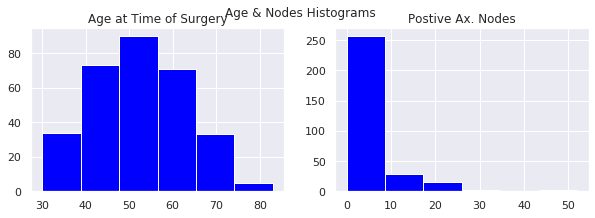

In [76]:
plt.figure(figsize=[10,3])

plt.suptitle('Age & Nodes Histograms',fontsize = 12)

plt.subplot(1,2,1) # (number of rows, number of columns, number of plot)
plt.hist(cdf['Age'],6)
plt.title('Age at Time of Surgery')

plt.subplot(1,2,2)
plt.hist(cdf['Nodes'],6)
plt.title('Postive Ax. Nodes');

In [77]:
cdf['Year'].min()

58

In [78]:
cdf['Year'].max()

69

Use logistic regression to predict survival after 5 years. How well does your model do?

What are the coefficients of logistic regression? Which features affect the outcome how?

Draw the learning curve for logistic regression in this case.

In [79]:
cmodel = LogisticRegression()
y = cdf['Survival']
X = cdf.copy()
del X['Survival']
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                test_size=0.30,
                                random_state=4444)
cmodel.fit(X_train,y_train)
cmodel.score(X_test,y_test)

0.8369565217391305

In [80]:
cmodel.classes_

array([1, 2])

In [81]:
cmodel.coef_

array([[0.01747174, 0.0063603 , 0.07192829]])

In [82]:
X.columns

Index(['Age', 'Year', 'Nodes'], dtype='object')

I don't remember for certain and don't have time to look it up, but it makes sense that the higher the feature * coefficient for any feature, the further we are pushed from the first binary category into the second. In this case the variables all work out the way I expect:

* The older the patient, the worse (more likely to be in survival category 2).
* The further back the year of surgery, the worse.
* The more nodes, the worse.

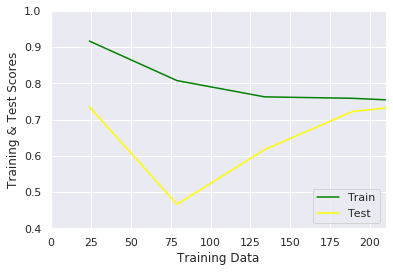

In [99]:
nc, trc_scores, tstc_scores = learning_curve(cmodel,X,y,random_state=4444)
avg_trc = [np.mean(row) for row in trc_scores]
avg_tstc = [np.mean(row) for row in tstc_scores]
plt.xlabel('Training Data')
plt.ylabel('Training & Test Scores')
plt.axis([0,210,0.40,1.0])
sns.set(palette = sns.color_palette(palette='husl'))
sns.lineplot(nc,avg_trc)
sns.lineplot(nc,avg_tstc)
plt.legend(['Train','Test'],loc=4);